In [ ]:
import tensorflow as tf

# 케라스 내장 데이터에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('train set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)
# 출력 내용의 의미: trainset에는 60000장의 사진이 있고, testset에는 10000장의 사진이 있다.

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


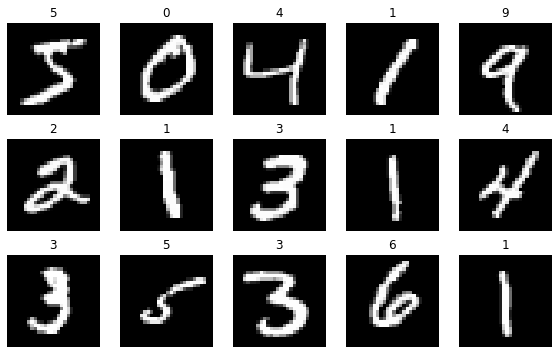

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]

  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

In [ ]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [ ]:
print(f'정규화 전] 최소값: {x_train.min()}, 최댓값: {x_train.max()}')

x_train = x_train/ x_train.max()

print(f'정규화 후] 최소값: {x_train.min()}, 최댓값: {x_train.max()}')

정규화 전] 최소값: 0, 최댓값: 255
정규화 후] 최소값: 0.0, 최댓값: 1.0


In [ ]:
#배열 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [14]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [15]:
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


In [16]:
# Dense 레어이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [17]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(128),
                             tf.keras.layers.Activation('relu')
])

In [18]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(32, activation='relu'),
                             # 노드 = 10개(클래스 개수와 동일)
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

In [20]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [21]:
# y가 원핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

In [22]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [23]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2267 - accuracy: 0.9329 - val_loss: 18.8108 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0936 - accuracy: 0.9719 - val_loss: 16.5310 - val_accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0657 - accuracy: 0.9795 - val_loss: 16.4906 - val_accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0490 - accuracy: 0.9844 - val_loss: 15.0001 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0413 - accuracy: 0.9866 - val_loss: 15.7386 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0327 - accuracy: 0.9893 - val_loss: 17.3602 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0268 - accuracy: 0.9912 - val_loss: 20.1676 - val_ac

In [25]:
# 평가
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 22.7356 - accuracy: 0.9785
검증 셋 정확도:  0.9785000085830688


In [27]:
# 예측
predictions = model.predict(x_test)

In [28]:
# 예측 결과 출력
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [29]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 6 9]


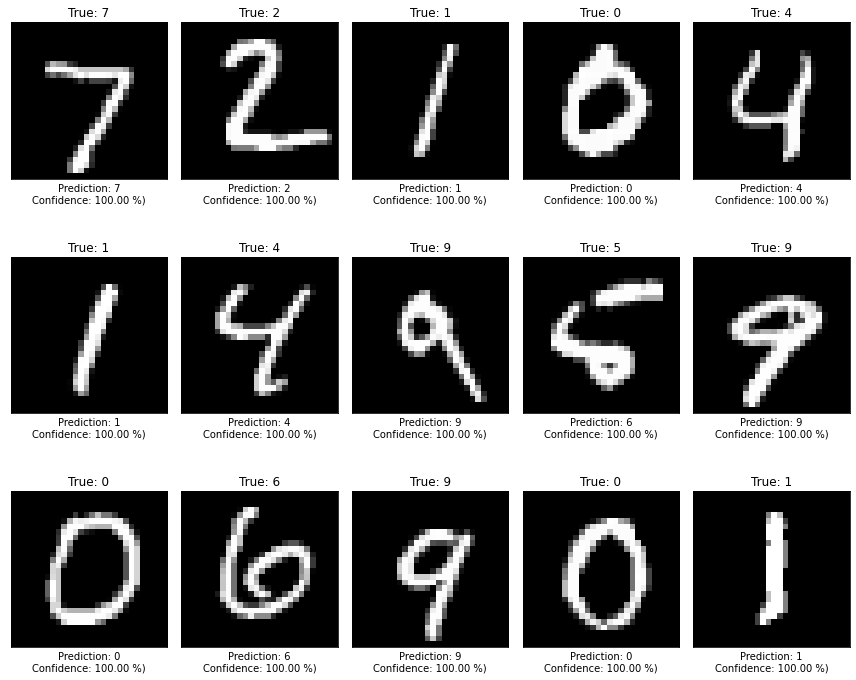

In [34]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100 * np.max(predictions[idx])
  return img, y_true, y_pred, confidence

#canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)

  # imshow 이미지 시각화
  ax.imshow(img, cmap = 'gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: {confidence:.2f} %)')
plt.tight_layout()
plt.show()